In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/zomato.csv


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df=pd.read_csv('/kaggle/input/zomato/zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
## Drop unnecessary columns from the DataFrame
df.drop(['address','listed_in(city)','menu_item','url','dish_liked','phone','reviews_list','cuisines'],axis=1,inplace=True)

In [9]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [10]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [11]:
# Drop null values from the DataFrame
df.dropna(inplace=True)

In [12]:
# rename columns
df.rename(columns={'approx_cost(for two people)':'bill_of_2plates','listed_in(type)':'type'},inplace=True)

In [13]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#replace values
df['rate'].replace(r'/5', '', regex = True , inplace = True)
df['rate'].replace({'-':np.nan,'NEW':np.nan },inplace=True)

/tmp/ipykernel_17/972488259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(r'/5', '', regex = True , inplace = True)
/tmp/ipykernel_17/972488259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [15]:
df['bill_of_2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [16]:
df['bill_of_2plates'].replace(',',"",regex=True,inplace=True)

/tmp/ipykernel_17/2660977125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bill_of_2plates'].replace(',',"",regex=True,inplace=True)


In [17]:
df['bill_of_2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [18]:
df.dtypes

name               object
online_order       object
book_table         object
rate               object
votes               int64
location           object
rest_type          object
bill_of_2plates    object
type               object
dtype: object

In [19]:
#Change data type
df['bill_of_2plates']=df['bill_of_2plates'].astype(int)
df['rate']=df['rate'].astype(float)

In [20]:
# Group the DataFrame by location and restaurant name, and calculate the average rating for each group
df.groupby(['location','name']).agg({'rate':'mean'})

rate
location    name                                      
BTM         100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.70
            2nd Home Restaurant                   3.70
            36th Cross Coffee Mane                3.70
            3B's - Buddies, Bar & Barbecues       4.40
            A2B - Adyar Ananda Bhavan             4.12
...                                                ...
Yeshwantpur The Cupcake Story                     3.50
            The Duke Of Juices                    3.30
            Tuckinto                              3.80
            Udupi Garden                          3.00
            Zam Zam Kabab House                   3.40

[9883 rows x 1 columns]

In [21]:
#detect min and max price of 2_plates in restaurant.
df.groupby(['location','name']).agg({'bill_of_2plates':['mean','min','max']})

bill_of_2plates            
                                                            mean   min   max
location    name                                                            
BTM         100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           450.0   450   450
            2nd Home Restaurant                            500.0   500   500
            36th Cross Coffee Mane                         500.0   500   500
            3B's - Buddies, Bar & Barbecues               1100.0  1100  1100
            A2B - Adyar Ananda Bhavan                      240.0   200   400
...                                                          ...   ...   ...
Yeshwantpur The Cupcake Story                              300.0   300   300
            The Duke Of Juices                             200.0   200   200
            Tuckinto                                       400.0   400   400
            Udupi Garden                                   300.0   300   300
            Zam Zam Kabab House                            300.0   300   300

[9883 rows x 3 columns]

# **Visualization**

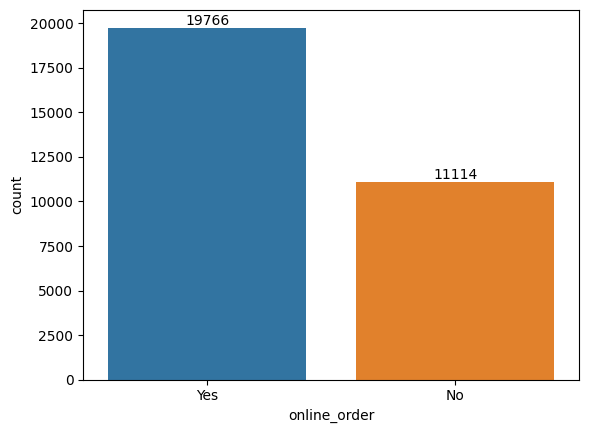

In [22]:
ax=sns.countplot(data=df,x='online_order')
for bars in ax.containers:
    ax.bar_label(bars)

**From the above graph, we can see that most restaurants take online orders.**



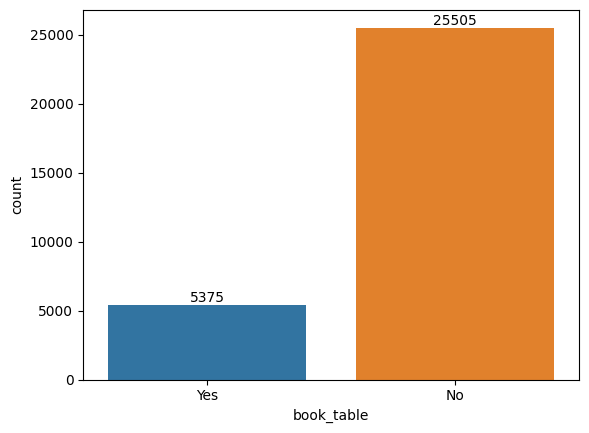

In [23]:
ax=sns.countplot(data=df,x='book_table')
for bars in ax.containers:
    ax.bar_label(bars)

**most of restaurants do not allow for table booking.**

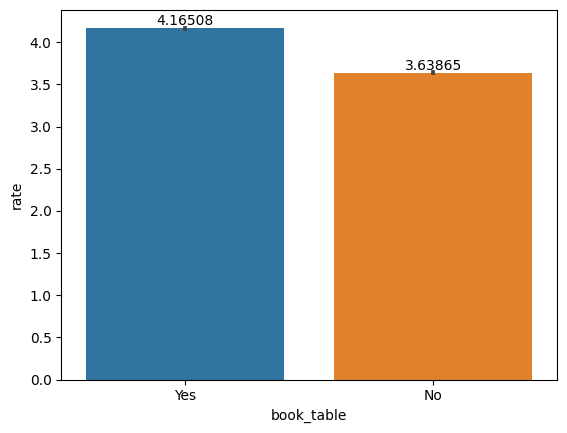

In [24]:
ax=sns.barplot(data=df, x='book_table', y='rate')
for bars in ax.containers:
    ax.bar_label(bars)

**restaurants that offer table booking table to have higher ratings**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Whitefield'),
  Text(3, 0, 'Koramangala 5th Block'),
  Text(4, 0, 'HSR'),
  Text(5, 0, 'Marathahalli'),
  Text(6, 0, 'JP Nagar'),
  Text(7, 0, 'Jayanagar'),
  Text(8, 0, 'Bellandur'),
  Text(9, 0, 'Electronic City')])

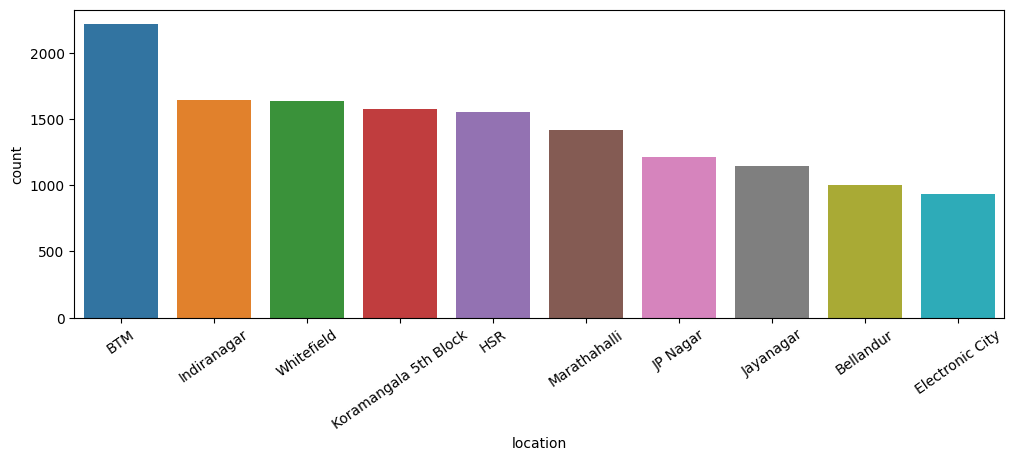

In [25]:
#top 10 location where the higher no. of restront
plt.figure(figsize=(12,4))
sns.countplot(x='location',data=df,order=df['location'].value_counts().index[:10])
plt.xticks(rotation=35)

<Axes: xlabel='type', ylabel='count'>

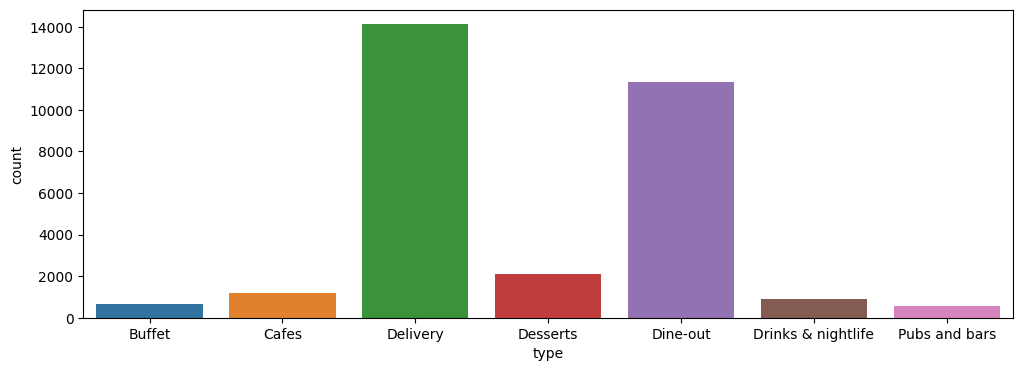

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='type')

**customer likes the restaurants which have delivery" and "dineout" service option.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'MG Road'),
  Text(2, 0, 'Lavelle Road'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'Residency Road'),
  Text(5, 0, 'St. Marks Road'),
  Text(6, 0, 'Cunningham Road'),
  Text(7, 0, 'Koramangala 3rd Block'),
  Text(8, 0, 'Koramangala 4th Block'),
  Text(9, 0, 'Sankey Road')])

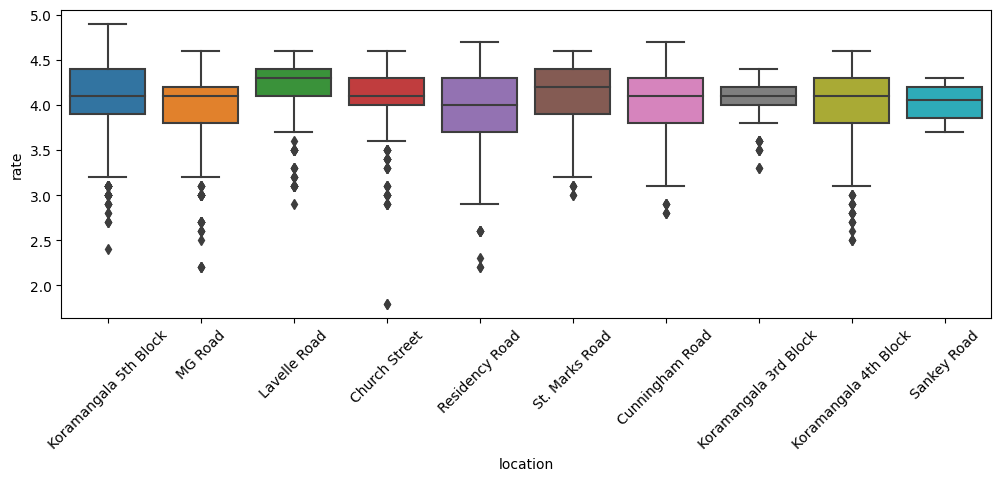

In [27]:
top_locations = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 4))
top_location_names = top_locations.index
filtered_df = df[df['location'].isin(top_location_names)]

sns.boxplot(x='location', y='rate', data=filtered_df)
plt.xticks(rotation=45)

**all locations have rating lies betwen 3.5 to 4.5, which most of the restaurants have rating 3.5 to 4.5.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lavelle Road'),
  Text(1, 0, 'St. Marks Road'),
  Text(2, 0, 'Koramangala 5th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'Koramangala 3rd Block'),
  Text(5, 0, 'Sankey Road'),
  Text(6, 0, 'Koramangala 4th Block'),
  Text(7, 0, 'Cunningham Road'),
  Text(8, 0, 'MG Road'),
  Text(9, 0, 'Residency Road')])

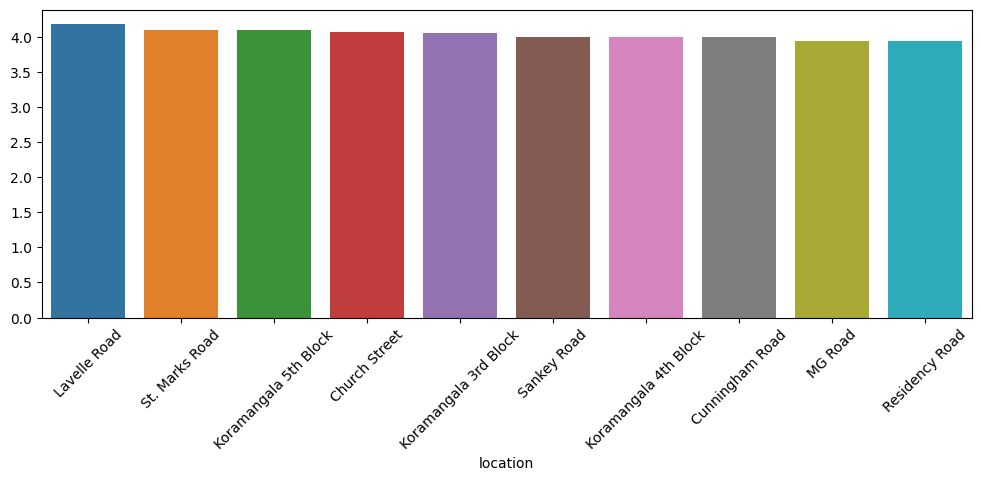

In [28]:
# top 10 restront location which have higher rating
plt.figure(figsize=(12,4))
top_locations = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45)

<Axes: xlabel='type', ylabel='rate'>

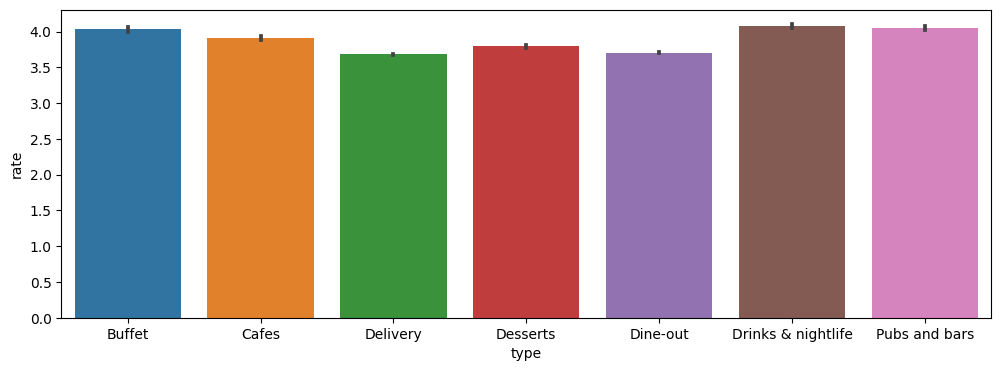

In [29]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='type',y='rate')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(<Axes: xlabel='bill_of_2plates', ylabel='Count'>,)

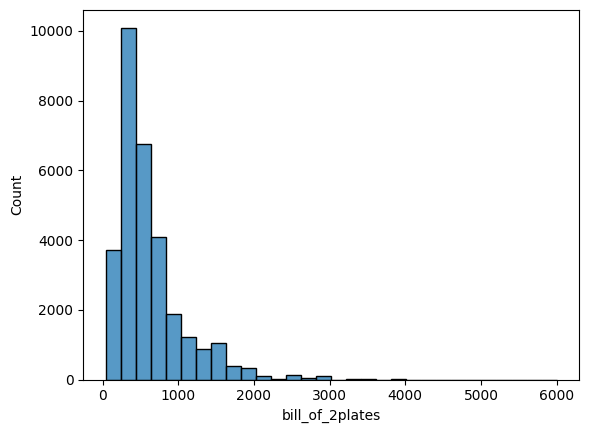

In [30]:
sns.histplot(data=df,x='bill_of_2plates',bins=30),#order=df['location'].value_counts().index[:10])

**most of the restront bill of two people lies in between 250-750rs.**